In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

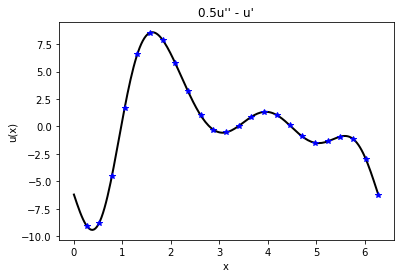

In [13]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

f_hat = fft(fp)
fp_hat = ((1j*k)*f_hat)
fp2 = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
der = 2*np.sin(x2)*np.cos(x2)**2-np.sin(x2)**3+2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))

# Calculate second derivative analytically
der2 = 2 * np.cos(x2)**3 - 7*np.cos(x2)*np.sin(x2)**2 - 2*np.exp(2*np.sin(1 + x2))*(-2 * np.cos(1 + x2)**2 + np.sin(1 + x2))

plt.plot(x2, 0.5 * der2 - der, '-k',linewidth=2., label="Analytic")
plt.plot(x1, 0.5 * fp2 - fp, '*b', label="Approx")
plt.title("0.5u'' - u'")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.savefig('spectral2_derivative.pdf')
plt.show()

# Problem 2

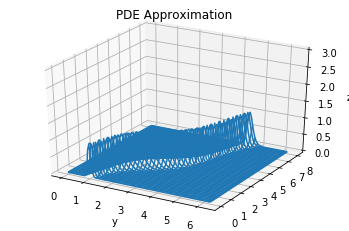

In [25]:
# Time steps
t_steps = 150 
# x time steps
x_steps = 100 

# Set up functions
c = lambda x: 0.2 + np.sin(x - 1)**2
u0 = lambda x: np.exp(-100*(x-1)**2)
x_domain = np.linspace(0, 2*np.pi, x_steps)
t_domain = np.linspace(0, 8, t_steps)

# Set up f function for scipy odeint function
k = np.concatenate(( np.arange(0,x_steps/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-x_steps/2+1,0,1) ))

def f(u, t):
    u_hat = fft(u)
    up_hat = ((1j*k)*u_hat)
    up = np.real(ifft(up_hat))
    return -c(x_domain) * up

# Approximate solution
sol = odeint(f, u0(x_domain), t_domain)

# Plot the solution
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.set_zlabel("z")
plt.title("PDE Approximation")
plt.show()